In [6]:
import pandas as pd

# Read the Parquet file
df = pd.read_parquet('/kaggle/input/visual-taxonomy/category_attributes.parquet', engine='pyarrow')  # or engine='fastparquet'

# Display the DataFrame
print(df)

              Category  No_of_attribute  \
0          Men Tshirts                5   
1               Sarees               10   
2               Kurtis                9   
3        Women Tshirts                8   
4  Women Tops & Tunics               10   

                                                                                                                        Attribute_list  
0                                                                         [color, neck, pattern, print_or_pattern_type, sleeve_length]  
1  [blouse_pattern, border, border_width, color, occasion, ornamentation, pallu_details, pattern, print_or_pattern_type, transparency]  
2                   [color, fit_shape, length, occasion, ornamentation, pattern, print_or_pattern_type, sleeve_length, sleeve_styling]  
3                           [color, fit_shape, length, pattern, print_or_pattern_type, sleeve_length, sleeve_styling, surface_styling]  
4    [color, fit_shape, length, neck_collar, ocassion, p

In [7]:
import pandas as pd

# Set Pandas options to display more data
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', None)     # Display all rows
pd.set_option('display.max_colwidth', None)  # Display full content in each column

# Assuming your DataFrame is already loaded
print(df)  # or df.head() if you just want the top few rows

              Category  No_of_attribute  \
0          Men Tshirts                5   
1               Sarees               10   
2               Kurtis                9   
3        Women Tshirts                8   
4  Women Tops & Tunics               10   

                                                                                                                        Attribute_list  
0                                                                         [color, neck, pattern, print_or_pattern_type, sleeve_length]  
1  [blouse_pattern, border, border_width, color, occasion, ornamentation, pallu_details, pattern, print_or_pattern_type, transparency]  
2                   [color, fit_shape, length, occasion, ornamentation, pattern, print_or_pattern_type, sleeve_length, sleeve_styling]  
3                           [color, fit_shape, length, pattern, print_or_pattern_type, sleeve_length, sleeve_styling, surface_styling]  
4    [color, fit_shape, length, neck_collar, ocassion, p

# **Correcting just Men's Tshirts data**

Loaded csv file.
   id     Category  len      attr_1 attr_2   attr_3   attr_4         attr_5  \
0   0  Men Tshirts    5     default  round  printed  default  short sleeves   
1   1  Men Tshirts    5  multicolor   polo    solid    solid  short sleeves   
2   2  Men Tshirts    5     default   polo    solid    solid  short sleeves   
3   3  Men Tshirts    5  multicolor   polo    solid    solid  short sleeves   
4   4  Men Tshirts    5  multicolor   polo    solid    solid  short sleeves   

  attr_6 attr_7 attr_8 attr_9 attr_10  
0    NaN    NaN    NaN    NaN     NaN  
1    NaN    NaN    NaN    NaN     NaN  
2    NaN    NaN    NaN    NaN     NaN  
3    NaN    NaN    NaN    NaN     NaN  
4    NaN    NaN    NaN    NaN     NaN  


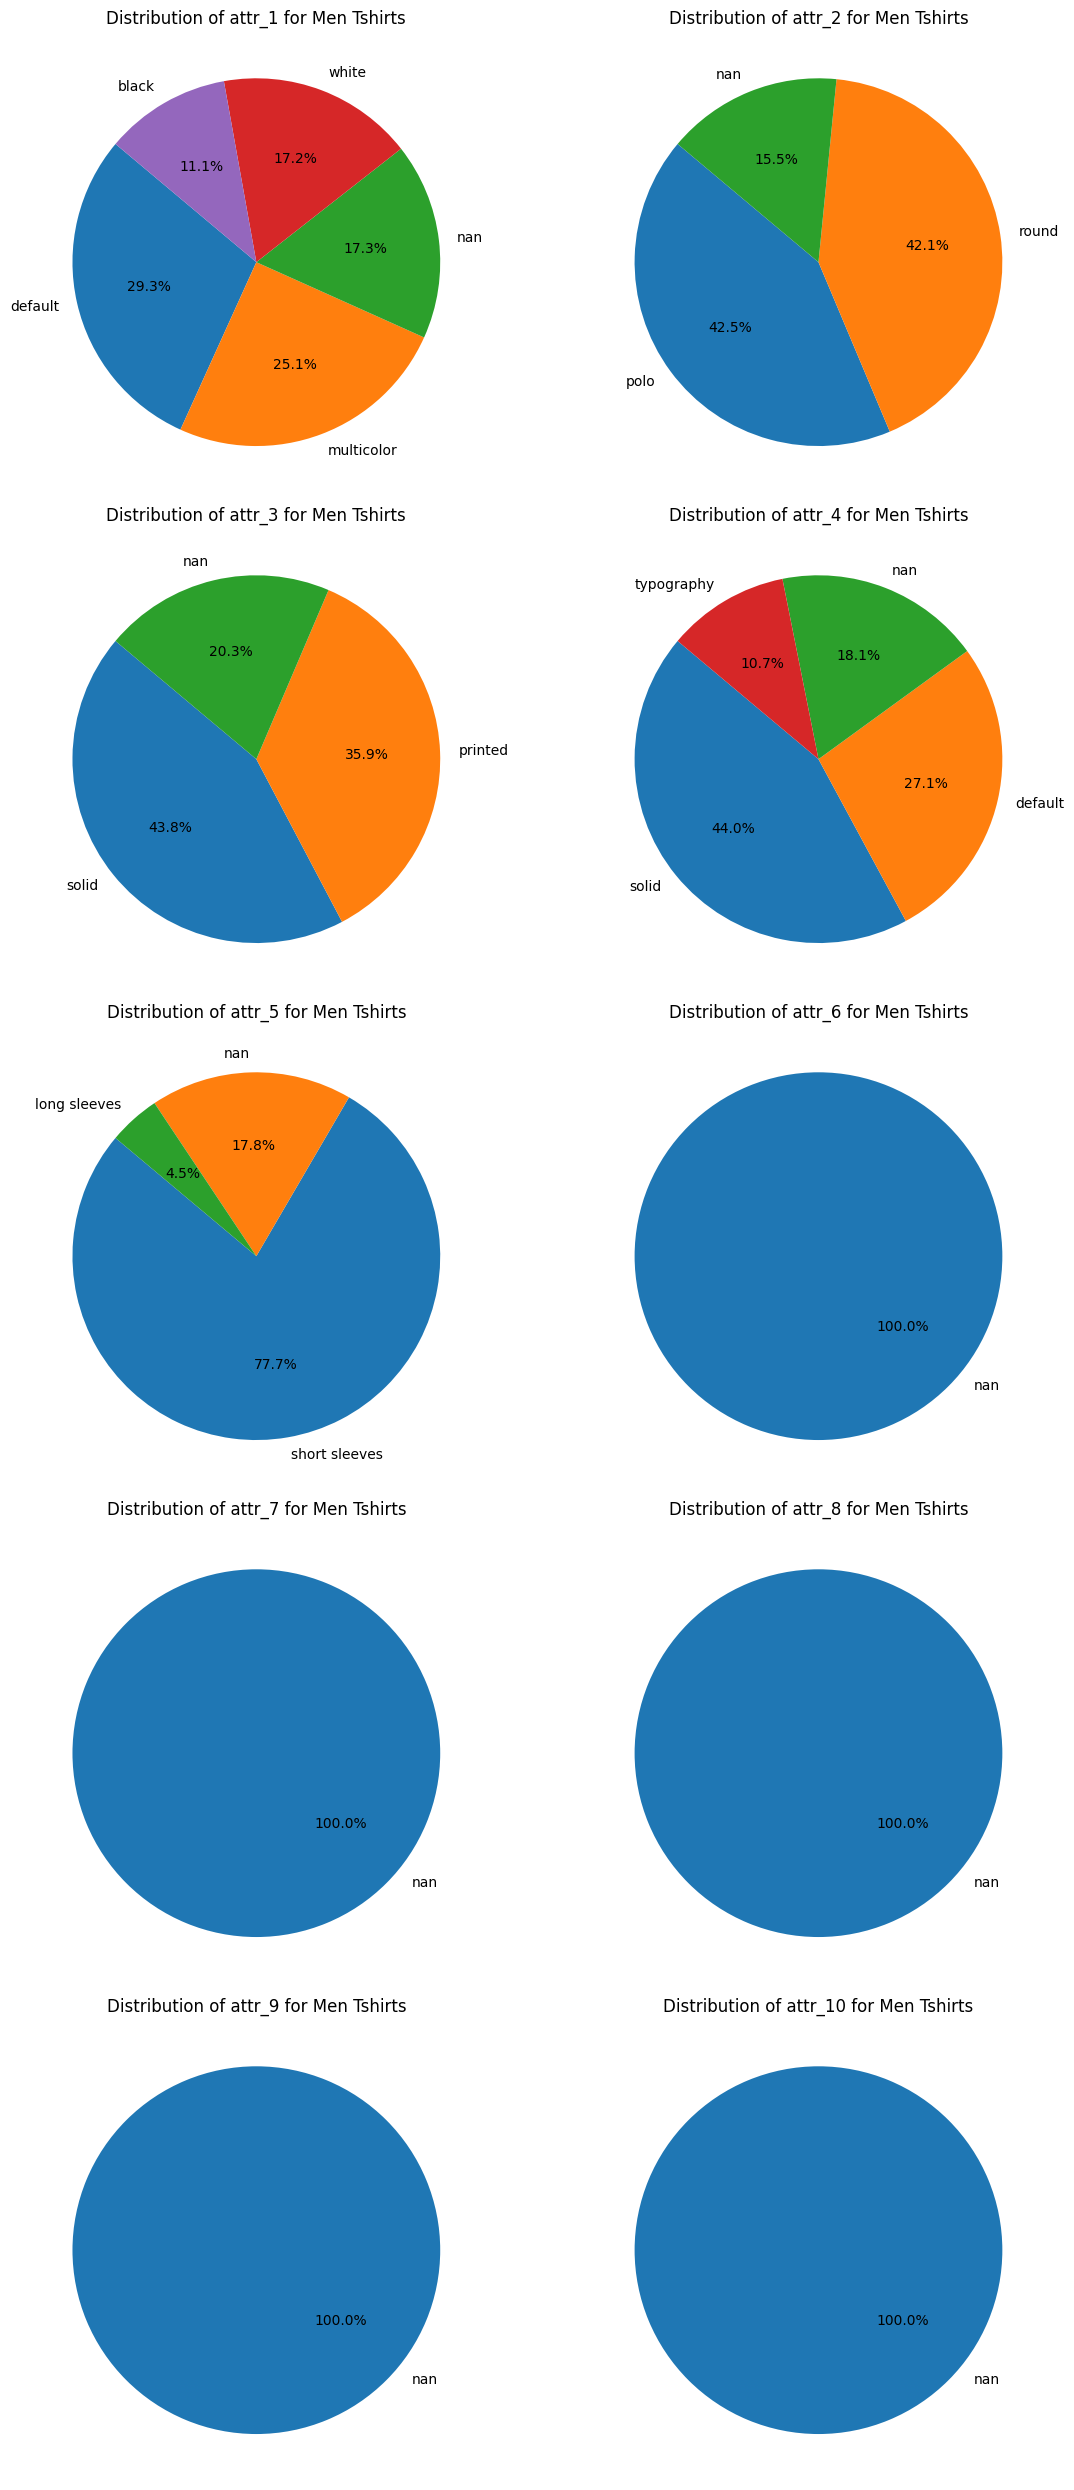

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Load the data
data = pd.read_csv('/kaggle/input/visual-taxonomy/train.csv')
print("Loaded csv file.")
print(data.head())

# Specify the target category
target_category = "Men Tshirts"

# Filter data to include only the specified category
filtered_data = data[data['Category'] == target_category]

# Function to generate a unique color map based on the number of categories in a column
def generate_colors(n):
    color_list = list(mcolors.TABLEAU_COLORS)  # Use Tableau colors for variety
    if n <= len(color_list):
        return color_list[:n]
    else:
        return plt.cm.get_cmap('hsv', n)(range(n))  # Generate unique colors if categories exceed standard colors

# Loop through each column in the filtered data to generate pie charts
columns_to_plot = [column for column in filtered_data.columns if column not in ['id', 'Category','len']]
num_attributes = len(columns_to_plot)  # Calculate number of attributes to plot
num_rows = (num_attributes + 1) // 2  # Calculate number of rows needed (2 columns)

# Create a figure with a 2-column grid
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop through each column to generate pie charts
for i, column in enumerate(columns_to_plot):
    # Calculate value counts for the column, including missing values
    value_counts = filtered_data[column].value_counts(dropna=False)
    if value_counts.isnull().any():
        value_counts.index = value_counts.index.fillna('Missing')  # Label missing values as 'Missing'

    # Generate a unique color map for each pie chart
    colors = generate_colors(len(value_counts))

    # Plot pie chart on the corresponding axes
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    axes[i].set_title(f"Distribution of {column} for {target_category}")

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os

# Load and preprocess the data
train_csv_path = '/kaggle/input/visual-taxonomy/train.csv'
train_img_dir = '/kaggle/input/visual-taxonomy/train_images/'

# Load the labels from train.csv
data = pd.read_csv(train_csv_path)

# Filter data for "Men Tshirts" category and select the first 8 columns for attributes
target_category = "Men Tshirts"
df = data[data['Category'] == target_category]

df['image_path'] = df['id'].apply(lambda x: os.path.join(train_img_dir, f"{x:06d}.jpg"))
df = df.drop(['Category','len', 'attr_6','attr_7','attr_8','attr_9','attr_10'], axis=1)
df.rename(columns={'attr_1': 'color', 'attr_2': 'neck','attr_3': 'pattern','attr_4': 'print_or_pattern_type','attr_5': 'sleeve_length'}, inplace=True)
# df = df.fillna('dummy_value')
# df = df.dropna()
print("Done")

Done


/tmp/ipykernel_30/202926561.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['image_path'] = df['id'].apply(lambda x: os.path.join(train_img_dir, f"{x:06d}.jpg"))


In [10]:
df.head()

,id,color,neck,pattern,print_or_pattern_type,sleeve_length,image_path
0,0,default,round,printed,default,short sleeves,/kaggle/input/visual-taxonomy/train_images/000000.jpg
1,1,multicolor,polo,solid,solid,short sleeves,/kaggle/input/visual-taxonomy/train_images/000001.jpg
2,2,default,polo,solid,solid,short sleeves,/kaggle/input/visual-taxonomy/train_images/000002.jpg
3,3,multicolor,polo,solid,solid,short sleeves,/kaggle/input/visual-taxonomy/train_images/000003.jpg
4,4,multicolor,polo,solid,solid,short sleeves,/kaggle/input/visual-taxonomy/train_images/000004.jpg


In [11]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 id                          0
color                    1257
neck                     1123
pattern                  1476
print_or_pattern_type    1318
sleeve_length            1290
image_path                  0
dtype: int64


In [12]:
df.shape

(7267, 7)

**20% of data is missing. So let us try to impute certain values there using models**

In [13]:
train_df=df

In [14]:
# Function to load and preprocess image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array

# Example function to create a CNN-based model for imputation
def create_imputer_model(output_classes):
    base_model = tf.keras.applications.ResNet50(
        input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False  # Freeze backbone for initial training
    
    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(output_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [15]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Dictionary to store mappings for each categorical column
label_mappings = {}
categorical_columns = ['color', 'neck', 'pattern', 'print_or_pattern_type', 'sleeve_length']

# Loop over each categorical column, encode, and store mapping
for col in categorical_columns:
    le = LabelEncoder()
    
    # Fit and transform only non-missing values
    non_missing = train_df[col].dropna()
    train_df.loc[train_df[col].notna(), col] = le.fit_transform(non_missing)
    
    # Store the mapping of classes to integer labels
    label_mappings[col] = dict(enumerate(le.classes_))
    
    # Ensure missing values are restored as NaN in the DataFrame
    train_df[col] = train_df[col].astype(float)  # Ensure NaN compatibility
    train_df.loc[train_df[col].isnull(), col] = np.nan
    
print("Encoded DataFrame:")
print(train_df.head())
print("\nLabel Mappings:")
print(label_mappings)


Encoded DataFrame:
   id  color  neck  pattern  print_or_pattern_type  sleeve_length  \
0   0    1.0   1.0      0.0                    0.0            1.0   
1   1    2.0   0.0      1.0                    1.0            1.0   
2   2    1.0   0.0      1.0                    1.0            1.0   
3   3    2.0   0.0      1.0                    1.0            1.0   
4   4    2.0   0.0      1.0                    1.0            1.0   

                                              image_path  
0  /kaggle/input/visual-taxonomy/train_images/000000.jpg  
1  /kaggle/input/visual-taxonomy/train_images/000001.jpg  
2  /kaggle/input/visual-taxonomy/train_images/000002.jpg  
3  /kaggle/input/visual-taxonomy/train_images/000003.jpg  
4  /kaggle/input/visual-taxonomy/train_images/000004.jpg  

Label Mappings:
{'color': {0: 'black', 1: 'default', 2: 'multicolor', 3: 'white'}, 'neck': {0: 'polo', 1: 'round'}, 'pattern': {0: 'printed', 1: 'solid'}, 'print_or_pattern_type': {0: 'default', 1: 'solid', 2: '

In [16]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np

# Constants for image dimensions and batch size
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

# For each attribute, filter data, train model, and impute missing values
for attribute in ['color', 'neck', 'pattern', 'print_or_pattern_type', 'sleeve_length']:
    # Filter data for attribute (only rows where this attribute is not missing)
    subset = train_df.dropna(subset=[attribute])
    
    # Load and preprocess images
    X = np.array([preprocess_image(img_path) for img_path in subset['image_path']])
    y = subset[attribute].values
    
    # Train-test split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the CNN-based model
    model = create_imputer_model(output_classes=len(label_mappings[attribute]))
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=BATCH_SIZE)
    
    
    # Impute missing values
    missing_subset = train_df[train_df[attribute].isnull()]
    if not missing_subset.empty:
        X_missing = np.array([preprocess_image(img_path) for img_path in missing_subset['image_path']])
        y_missing_pred = model.predict(X_missing).argmax(axis=1)
        print(f"Predicted: {attribute}")
#         # Convert integer predictions back to original string labels
#         y_missing_pred_str = [label_mappings[attribute][int(label)] for label in y_missing_pred]
        
        # Fill missing values in the main dataset with decoded string labels
        train_df.loc[train_df[attribute].isnull(), attribute] = y_missing_pred
        
# Now train the final model on the fully imputed dataset with images and attributes


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5


I0000 00:00:1730820969.857151     114 service.cc:145] XLA service 0x7c5f10156b60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730820969.857213     114 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730820969.857218     114 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  2/151 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.2812 - loss: 1.8778 

I0000 00:00:1730820977.094609     114 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


151/151 ━━━━━━━━━━━━━━━━━━━━ 42s 174ms/step - accuracy: 0.5608 - loss: 1.0669 - val_accuracy: 0.7138 - val_loss: 0.7024
Epoch 2/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 0.7280 - loss: 0.6642 - val_accuracy: 0.7205 - val_loss: 0.6952
Epoch 3/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.7595 - loss: 0.5734 - val_accuracy: 0.7288 - val_loss: 0.6881
Epoch 4/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - accuracy: 0.7722 - loss: 0.5701 - val_accuracy: 0.7321 - val_loss: 0.6722
Epoch 5/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - accuracy: 0.7771 - loss: 0.5237 - val_accuracy: 0.7171 - val_loss: 0.7124
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 197ms/step
Predicted: color
Epoch 1/5
154/154 ━━━━━━━━━━━━━━━━━━━━ 38s 181ms/step - accuracy: 0.9068 - loss: 0.2413 - val_accuracy: 0.9642 - val_loss: 0.0764
Epoch 2/5
154/154 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.9786 - loss: 0.0465 - val_accuracy: 0.9756 - val_loss: 0.0566
Epoch 3/5
154/154 ━━━━━━━━━━━━━━━━━━━━ 16s 10

In [17]:
missing_values = train_df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 id                       0
color                    0
neck                     0
pattern                  0
print_or_pattern_type    0
sleeve_length            0
image_path               0
dtype: int64


In [18]:
label_mappings

{'color': {0: 'black', 1: 'default', 2: 'multicolor', 3: 'white'},
 'neck': {0: 'polo', 1: 'round'},
 'pattern': {0: 'printed', 1: 'solid'},
 'print_or_pattern_type': {0: 'default', 1: 'solid', 2: 'typography'},
 'sleeve_length': {0: 'long sleeves', 1: 'short sleeves'}}

In [19]:
import pandas as pd

# Label mappings
label_mappings = {
    'color': {0: 'black', 1: 'default', 2: 'multicolor', 3: 'white'},
    'neck': {0: 'polo', 1: 'round'},
    'pattern': {0: 'printed', 1: 'solid'},
    'print_or_pattern_type': {0: 'default', 1: 'solid', 2: 'typography'},
    'sleeve_length': {0: 'long sleeves', 1: 'short sleeves'}
}

# Convert float columns to int before mapping
for column, mapping in label_mappings.items():
    train_df[column] = train_df[column].astype(int).map(mapping)


In [20]:
train_df.head()

,id,color,neck,pattern,print_or_pattern_type,sleeve_length,image_path
0,0,default,round,printed,default,short sleeves,/kaggle/input/visual-taxonomy/train_images/000000.jpg
1,1,multicolor,polo,solid,solid,short sleeves,/kaggle/input/visual-taxonomy/train_images/000001.jpg
2,2,default,polo,solid,solid,short sleeves,/kaggle/input/visual-taxonomy/train_images/000002.jpg
3,3,multicolor,polo,solid,solid,short sleeves,/kaggle/input/visual-taxonomy/train_images/000003.jpg
4,4,multicolor,polo,solid,solid,short sleeves,/kaggle/input/visual-taxonomy/train_images/000004.jpg


# **Checking model accuracy after imputation**

In [21]:
df=train_df

In [22]:
from sklearn.preprocessing import LabelEncoder

# Dictionary to store mappings for each categorical column
label_mappings = {}
categorical_columns = ['color', 'neck', 'pattern', 'print_or_pattern_type', 'sleeve_length']
# Loop over each categorical column, encode, and store mapping
for col in categorical_columns:
    le = LabelEncoder()
    # Fit and transform the column to integer codes
    df[col] = le.fit_transform(df[col])
    
    # Store the mapping of classes to integer labels
    label_mappings[col] = dict(enumerate(le.classes_))

print("Encoded DataFrame:")
print(df.head())
print("\nLabel Mappings:")
print(label_mappings)

Encoded DataFrame:
   id  color  neck  pattern  print_or_pattern_type  sleeve_length  \
0   0      1     1        0                      0              1   
1   1      2     0        1                      1              1   
2   2      1     0        1                      1              1   
3   3      2     0        1                      1              1   
4   4      2     0        1                      1              1   

                                              image_path  
0  /kaggle/input/visual-taxonomy/train_images/000000.jpg  
1  /kaggle/input/visual-taxonomy/train_images/000001.jpg  
2  /kaggle/input/visual-taxonomy/train_images/000002.jpg  
3  /kaggle/input/visual-taxonomy/train_images/000003.jpg  
4  /kaggle/input/visual-taxonomy/train_images/000004.jpg  

Label Mappings:
{'color': {0: 'black', 1: 'default', 2: 'multicolor', 3: 'white'}, 'neck': {0: 'polo', 1: 'round'}, 'pattern': {0: 'printed', 1: 'solid'}, 'print_or_pattern_type': {0: 'default', 1: 'solid', 2: '

In [23]:
from sklearn.model_selection import train_test_split

# Split the data for training and validation
train_df, val_df = train_test_split(df, test_size=0.1, random_state=42)


# Define image parameters
IMG_HEIGHT, IMG_WIDTH = 224, 224  # Standard image size for CNN models
BATCH_SIZE = 32

# Data generator for real-time data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Train and validation data generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_img_dir,
    x_col='image_path',
    y_col=['color', 'neck', 'pattern', 'print_or_pattern_type', 'sleeve_length'],
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='multi_output'
)

val_generator = train_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=train_img_dir,
    x_col='image_path',
    y_col=['color', 'neck', 'pattern', 'print_or_pattern_type', 'sleeve_length'],
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='multi_output'
)


# Model Architecture
def build_model():
    # Shared Backbone
    base_model = tf.keras.applications.ResNet50(
        input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False  # Freeze the backbone initially

    # Global feature extractor
    x = layers.GlobalAveragePooling2D()(base_model.output)

    # Attribute-specific heads
    color_head = layers.Dense(128, activation='relu')(x)
    color_head = layers.Dense(num_classes['color'], activation='softmax', name='color')(color_head)

    neck_head = layers.Dense(128, activation='relu')(x)
    neck_head = layers.Dense(num_classes['neck'], activation='softmax', name='neck')(neck_head)

    pattern_head = layers.Dense(128, activation='relu')(x)
    pattern_head = layers.Dense(num_classes['pattern'], activation='softmax', name='pattern')(pattern_head)

    print_type_head = layers.Dense(128, activation='relu')(x)
    print_type_head = layers.Dense(num_classes['print_or_pattern_type'], activation='softmax', name='print_or_pattern_type')(print_type_head)

    sleeve_length_head = layers.Dense(128, activation='relu')(x)
    sleeve_length_head = layers.Dense(num_classes['sleeve_length'], activation='softmax', name='sleeve_length')(sleeve_length_head)

    # Define the model
    model = models.Model(inputs=base_model.input, outputs=[color_head, neck_head, pattern_head, print_type_head, sleeve_length_head])

    return model

# Number of classes for each attribute
num_classes = {
    'color': df['color'].nunique(),
    'neck': df['neck'].nunique(),
    'pattern': df['pattern'].nunique(),
    'print_or_pattern_type': df['print_or_pattern_type'].nunique(),
    'sleeve_length': df['sleeve_length'].nunique()
}

# Instantiate and compile the model
model = build_model()


Found 6540 validated image filenames.
Found 727 validated image filenames.


In [24]:
import tensorflow as tf

def create_dataset(dataframe, batch_size):
    def generator():
        for _, row in dataframe.iterrows():
            # Load and preprocess the image
            img = tf.io.read_file(row['image_path'])
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
            img = img / 255.0  # Normalize to [0,1]

            # Labels as a tuple of individual attributes
            labels = (
                row['color'],
                row['neck'],
                row['pattern'],
                row['print_or_pattern_type'],
                row['sleeve_length']
            )
            yield img, labels

    # Set the output signature for TensorFlow to understand the data types and shapes
    output_signature = (
        tf.TensorSpec(shape=(IMG_HEIGHT, IMG_WIDTH, 3), dtype=tf.float32),  # Image shape and dtype
        (
            tf.TensorSpec(shape=(), dtype=tf.int32),  # color
            tf.TensorSpec(shape=(), dtype=tf.int32),  # neck
            tf.TensorSpec(shape=(), dtype=tf.int32),  # pattern
            tf.TensorSpec(shape=(), dtype=tf.int32),  # print_or_pattern_type
            tf.TensorSpec(shape=(), dtype=tf.int32),  # sleeve_length
        )
    )

    # Create the dataset from the generator
    dataset = tf.data.Dataset.from_generator(
        generator,
        output_signature=output_signature
    )
    return dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Create train and validation datasets
train_dataset = create_dataset(train_df, BATCH_SIZE)
val_dataset = create_dataset(val_df, BATCH_SIZE)

In [25]:
train_dataset = train_dataset.repeat()
val_dataset = val_dataset.repeat()

In [26]:
# Phase 1: Unfreeze the backbone and all layers
for layer in model.layers:
    layer.trainable = True

# Compile again with a lower learning rate for fine-tuning
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss={
        'color': 'sparse_categorical_crossentropy',
        'neck': 'sparse_categorical_crossentropy',
        'pattern': 'sparse_categorical_crossentropy',
        'print_or_pattern_type': 'sparse_categorical_crossentropy',
        'sleeve_length': 'sparse_categorical_crossentropy'
    },
    metrics={
        'color': ['accuracy'],
        'neck': ['accuracy'],
        'pattern': ['accuracy'],
        'print_or_pattern_type': ['accuracy'],
        'sleeve_length': ['accuracy']
    }
)

initial_epochs = 20

history_phase1 = model.fit(
    train_dataset,
    epochs=initial_epochs,
    steps_per_epoch=len(train_df) // BATCH_SIZE,
    validation_data=val_dataset,
    validation_steps=len(val_df) // BATCH_SIZE,
    verbose=1
)


Epoch 1/20


I0000 00:00:1730821771.331699     111 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_31', 20 bytes spill stores, 20 bytes spill loads



204/204 ━━━━━━━━━━━━━━━━━━━━ 173s 521ms/step - color_accuracy: 0.6378 - loss: 1.7782 - neck_accuracy: 0.9433 - pattern_accuracy: 0.9188 - print_or_pattern_type_accuracy: 0.8283 - sleeve_length_accuracy: 0.9355 - val_color_accuracy: 0.2202 - val_loss: 4.8439 - val_neck_accuracy: 0.5398 - val_pattern_accuracy: 0.4418 - val_print_or_pattern_type_accuracy: 0.3594 - val_sleeve_length_accuracy: 0.9261
Epoch 2/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 123s 492ms/step - color_accuracy: 0.8044 - loss: 0.7680 - neck_accuracy: 0.9911 - pattern_accuracy: 0.9786 - print_or_pattern_type_accuracy: 0.9277 - sleeve_length_accuracy: 0.9934 - val_color_accuracy: 0.2403 - val_loss: 5.4821 - val_neck_accuracy: 0.5554 - val_pattern_accuracy: 0.5266 - val_print_or_pattern_type_accuracy: 0.3784 - val_sleeve_length_accuracy: 0.9252
Epoch 3/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 97s 476ms/step - color_accuracy: 0.8701 - loss: 0.4772 - neck_accuracy: 0.9947 - pattern_accuracy: 0.9930 - print_or_pattern_type_accuracy: 0.9553 - sl

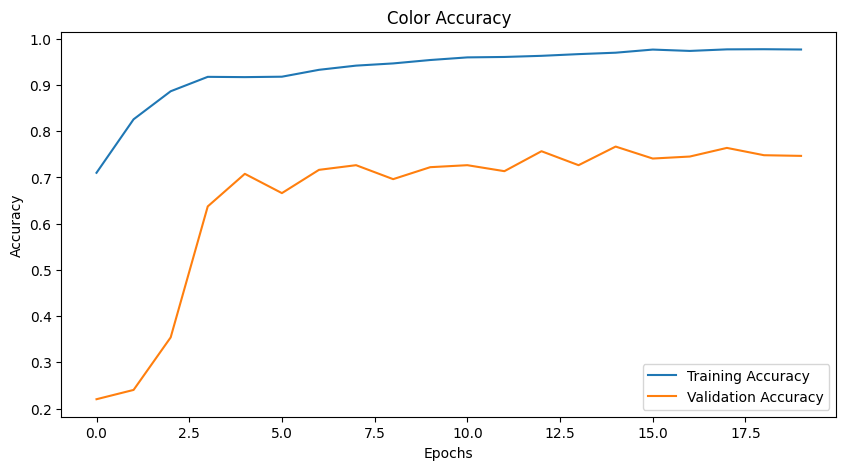

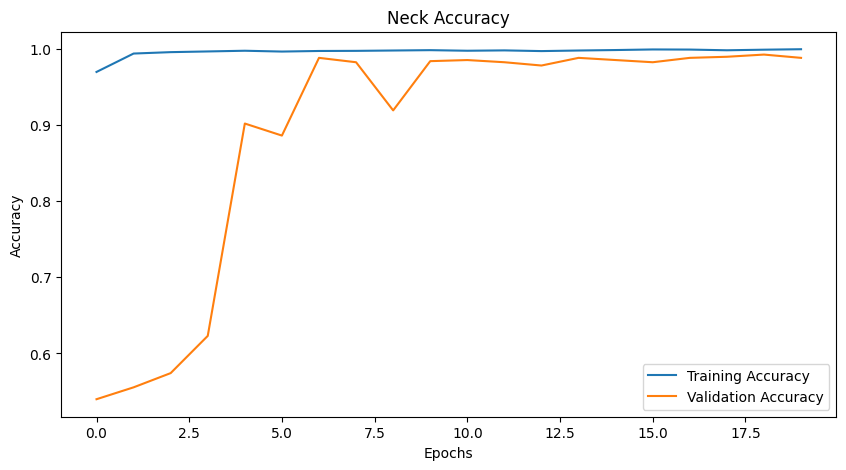

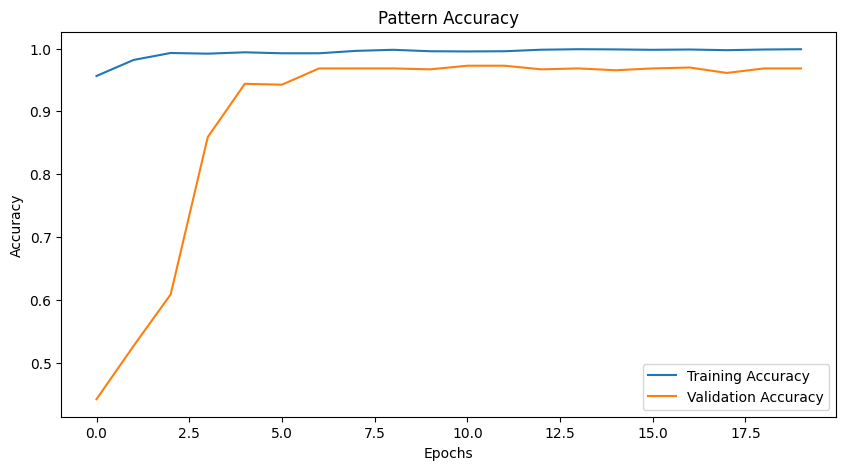

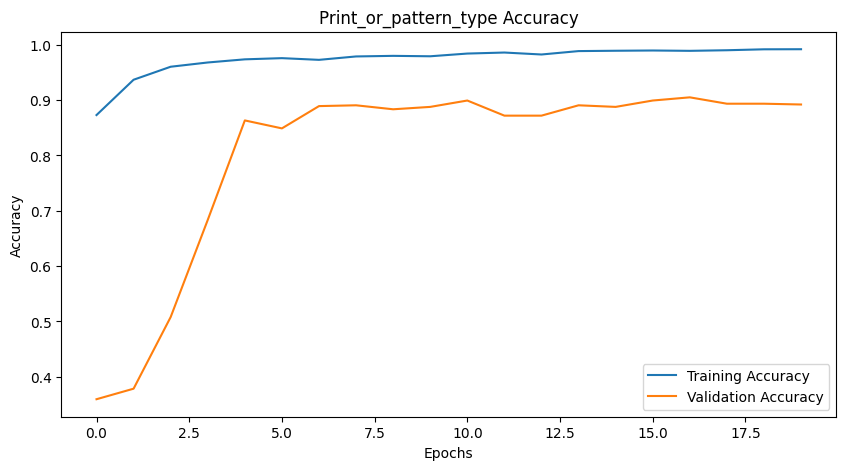

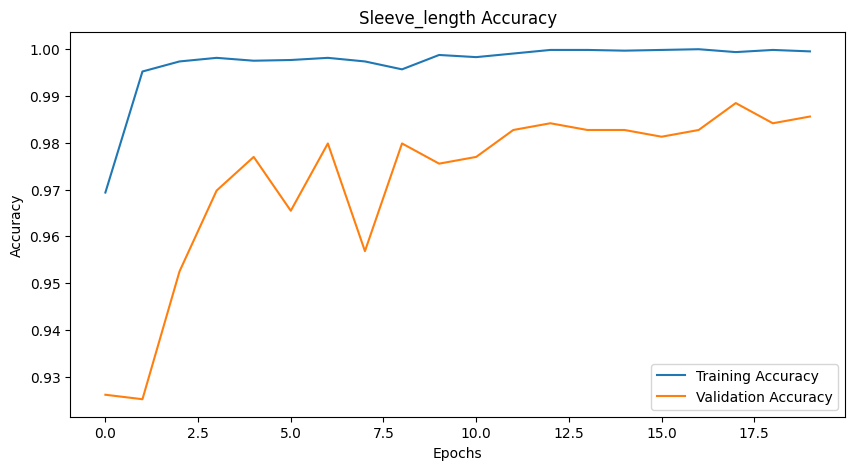

In [27]:
import matplotlib.pyplot as plt

# Define the names for each output
output_names = ["color", "neck", "pattern", "print_or_pattern_type", "sleeve_length"]

# Create a plot for each output
for output_name in output_names:
    plt.figure(figsize=(10, 5))
    
    # Plot training accuracy
    plt.plot(history_phase1.history[f'{output_name}_accuracy'], label='Training Accuracy')
    
    # Plot validation accuracy
    plt.plot(history_phase1.history[f'val_{output_name}_accuracy'], label='Validation Accuracy')
    
    # Set plot title and labels
    plt.title(f'{output_name.capitalize()} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Show the plot
    plt.show()


In [29]:
Model_collection={}
Model_collection["Men Tshirts"] = model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Actual Labels:
color: white
neck: round
pattern: printed
print_or_pattern_type: typography
sleeve_length: short sleeves

Predicted Labels:
color: white
neck: round
pattern: printed
print_or_pattern_type: typography
sleeve_length: short sleeves


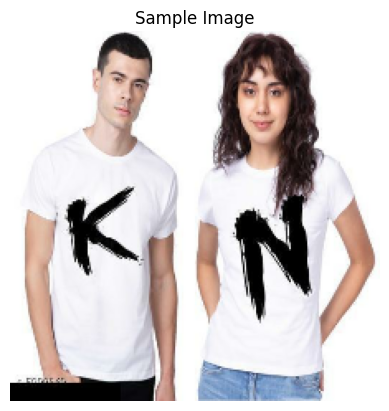

In [34]:
import matplotlib.pyplot as plt

# Select a sample image from the training data
sample_image_path = train_df.iloc[1000]['image_path']
sample_labels = train_df.iloc[1000][['color', 'neck', 'pattern', 'print_or_pattern_type', 'sleeve_length']]

# Load and preprocess the image
img = tf.io.read_file(sample_image_path)
img = tf.image.decode_jpeg(img, channels=3)
img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
img = img / 255.0  # Normalize to [0,1]
img_batch = tf.expand_dims(img, 0)  # Add batch dimension for model input

# Predict using the model
predicted_outputs = model.predict(img_batch)

# Decode predictions using label mappings
decoded_predictions = {}
for i, col in enumerate(['color', 'neck', 'pattern', 'print_or_pattern_type', 'sleeve_length']):
    predicted_label_idx = np.argmax(predicted_outputs[i], axis=1)[0]
    predicted_label = label_mappings[col][predicted_label_idx]
    decoded_predictions[col] = predicted_label

# Display the sample image
plt.imshow(img)
plt.axis('off')
plt.title("Sample Image")

# Print actual and predicted labels
print("Actual Labels:")
for col in sample_labels.index:
    actual_label = label_mappings[col][sample_labels[col]]
    print(f"{col}: {actual_label}")

print("\nPredicted Labels:")
for col, prediction in decoded_predictions.items():
    print(f"{col}: {prediction}")

plt.show()


# **Let us predict the images in test.csv**

In [35]:
import pandas as pd
import tensorflow as tf

# Load the test.csv and filter for the target category
test_csv_path = '/kaggle/input/visual-taxonomy/test.csv'
test_img_dir = '/kaggle/input/visual-taxonomy/test_images/'

# Load and filter the data
test_data = pd.read_csv(test_csv_path)
test_data = test_data[test_data['Category'] == target_category]

# Create image paths
test_data['image_path'] = test_data['id'].apply(lambda x: os.path.join(test_img_dir, f"{x:06d}.jpg"))


In [36]:
test_data.head()

,id,Category,image_path
0,0,Men Tshirts,/kaggle/input/visual-taxonomy/test_images/000000.jpg
1,1,Men Tshirts,/kaggle/input/visual-taxonomy/test_images/000001.jpg
2,2,Men Tshirts,/kaggle/input/visual-taxonomy/test_images/000002.jpg
3,3,Men Tshirts,/kaggle/input/visual-taxonomy/test_images/000003.jpg
4,4,Men Tshirts,/kaggle/input/visual-taxonomy/test_images/000004.jpg


In [37]:

# Function to create a dataset from test images
def create_test_dataset(dataframe, batch_size):
    def generator():
        for _, row in dataframe.iterrows():
            # Load and preprocess the image
            img = tf.io.read_file(row['image_path'])
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
            img = img / 255.0  # Normalize to [0,1]
            yield img

    output_signature = tf.TensorSpec(shape=(IMG_HEIGHT, IMG_WIDTH, 3), dtype=tf.float32)
    
    # Create the dataset
    dataset = tf.data.Dataset.from_generator(
        generator,
        output_signature=output_signature
    )
    return dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)


In [40]:
# Initialize submission DataFrame with columns 'id', 'Category', 'len', and the attribute columns
submission = pd.DataFrame(columns=['id', 'Category', 'len', 'color', 'neck', 'pattern', 'print_or_pattern_type', 'sleeve_length'])

# Set 'Category' and 'len' columns
submission['Category'] = target_category
submission['len'] = 5

# Loop over each image in the test data
for index, row in test_data.iterrows():
    # Load and preprocess the image
    img_path = os.path.join(test_img_dir, f"{row['id']:06d}.jpg")
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
    img = img / 255.0  # Normalize
    img_batch = tf.expand_dims(img, 0)  # Add batch dimension

    # Predict using the model
    predicted_outputs = model.predict(img_batch,verbose=0)

    # Decode predictions using label mappings
    predicted_attributes = []
    for i, col in enumerate(['color', 'neck', 'pattern', 'print_or_pattern_type', 'sleeve_length']):
        predicted_label_idx = np.argmax(predicted_outputs[i], axis=1)[0]
        predicted_label = label_mappings[col][predicted_label_idx]
        predicted_attributes.append(predicted_label)

    # Append the results to the submission DataFrame
    submission = pd.concat([submission, pd.DataFrame([[row['id'], target_category, 5] + predicted_attributes],
                                                     columns=submission.columns)], ignore_index=True)


In [41]:
submission.head()

,id,Category,len,color,neck,pattern,print_or_pattern_type,sleeve_length
0,0,Men Tshirts,5,multicolor,round,printed,default,long sleeves
1,1,Men Tshirts,5,white,round,printed,typography,long sleeves
2,2,Men Tshirts,5,white,round,printed,default,long sleeves
3,3,Men Tshirts,5,default,polo,solid,solid,short sleeves
4,4,Men Tshirts,5,black,round,solid,solid,long sleeves


In [44]:
# Rename the columns
submission.rename(columns={
    'color': 'attr_1', 
    'neck': 'attr_2', 
    'pattern': 'attr_3', 
    'print_or_pattern_type': 'attr_4', 
    'sleeve_length': 'attr_5'
}, inplace=True)

# Add columns attr_6 to attr_10 with "dummy_value"
for i in range(6, 11):
    submission[f'attr_{i}'] = "dummy_value"

# Save the modified DataFrame to CSV
output_path = "/kaggle/working/submissionMensTshirtFinal.csv"
submission.to_csv(output_path, index=False)

print(f"File saved successfully at {output_path}")


File saved successfully at /kaggle/working/submissionMensTshirtFinal.csv
